In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [499]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Importando os dados de treino e de teste
treinamento = pd.read_csv('drive/My Drive/Codenation/datasets/train.csv', sep=",",encoding="utf-8")
teste = pd.read_csv('drive/My Drive/Codenation/datasets/test.csv', sep=",",encoding="utf-8")

Mounted at /content/drive


In [0]:
def preencheZero(data, features):
    for item in features:
        data[item] = data[item].fillna(0)
    return data

def preencheMedia(data, features):
    for item in features:
        data[item] = data[item].fillna(data[item].mean())
    return data

def salvaResposta(predicoes, nomeArquivo):
  resposta = pd.DataFrame()
  resposta['NU_INSCRICAO'] = teste['NU_INSCRICAO']

  resposta['NU_NOTA_MT'] = predicoes
  resposta.to_csv('drive/My Drive/Codenation/answer/' + nomeArquivo + '.csv', index=False, header=True, float_format='%.1f')

def validaPerformanceModelos(pipelines, X, y):
    results = []
    names = []
    for name, model in pipelines:
        cv_results = cross_val_score(model, X, y, cv=5, scoring='r2')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [501]:
treinamento.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [502]:
teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [503]:
treinamento.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,...,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,13730.000000,13730.000000,13730.000000,4282.000000,13730.000000,4.282000e+03,4.282000e+03,4282.000000,4282.000000,4282.000000,4282.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.0,13730.000000,...,13730.0,13730.000000,13730.0,13730.0,13730.0,13730.000000,13730.000000,1638.000000,1.373000e+04,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,10341.000000,10341.000000,10133.000000,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000,6355.000000,6355.000000,6354.000000,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,1.782666,2.146176,1.353532,1.178888,0.129862,3.121720e+07,3.123638e+06,31.085474,2.259692,1.030827,1.001635,0.001238,0.0,0.000364,0.000510,0.0,0.002185,0.000146,0.000947,0.000073,0.000073,0.0,0.000437,0.000510,0.009687,0.000947,0.001602,0.000146,0.0,0.004151,...,0.0,0.000073,0.0,0.0,0.0,0.000364,0.119301,30.639194,3.085637e+06,30.709250,0.754479,0.754479,0.738747,0.738747,473.495155,529.661087,516.472841,482.497928,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,4.083467,3.833360,2.608812,4.375984,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,0.880734,3.217328,0.558472,0.565490,0.336163,9.540289e+06,9.574114e+05,9.546193,0.698586,0.172868,0.040404,0.035167,0.0,0.019080,0.022575,0.0,0.046695,0.012069,0.030757,0.008534,0.008534,0.0,0.020901,0.022575,0.097947,0.030757,0.039998,0.012069,0.0,0.064301,...,0.0,0.008534,0.0,0.0,0.0,0.019080,0.324154,9.884543,9.888721e+05,9.860227,0.431932,0.431932,0.440162,0.440162,71.093674,73.726344,68.688190,99.826323,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,1.603004,1.661301,2.234009,1.210998,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100189e+07,1.100023e+06,11.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,11.000000,1.100023e+06,11.000000,0.000000,0.

In [504]:
teste.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,1480.000000,4576.000000,1480.000000,4576.000000,4576.0,4576.000000,4576.0,4576.0,4576.000000,4576.000000,4576.0,4576.000000,4576.000000,4576.000000,3442.000000,3442.000000,3377.000000,4576.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000
mean,30.762019,21.542395,2.181163,1.060970,1.791084,2.119537,1.368663,1.182432,0.127404,2.264865,0.000874,0.0,0.000219,0.0,0.0,0.010271,0.000437,0.0,0.752185,0.752185,0.739729,473.136287,529.195264,514.304205,0.604458,1.095943,119.626888,111.915902,106.384365,112.881256,76.683447,527.491857
std,9.912313,6.854073,1.017531,0.281289,0.875692,3.210353,0.568589,0.572495,0.333461,0.716922,0.029556,0.0,0.014783,0.0,0.0,0.100835,0.020904,0.0,0.431791,0.431791,0.440818,70.995131,73.086665,67.725564,0.489020,0.695047,29.028146,33.296849,33.834492,33.202244,42.985637,151.979490
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,419.625000,479.725000,468.400000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,458.250000,532.000000,516.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,540.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,514.350000,579.550000,562.400000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,65.000000,5.000000,4.000000,4.000000,10.000000,3.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,2.000000,778.900000,773.600000,708.900000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000


In [505]:
#Análise das Correlações
features= []
features_list = []

correlacoes = treinamento.corr()
features = correlacoes[(correlacoes['NU_NOTA_MT'] <= -0.3) | (correlacoes['NU_NOTA_MT'] >= 0.3) & (correlacoes['NU_NOTA_MT'] != 1.0)]['NU_NOTA_MT']
features_list = features.index.to_list()

#Faz uma copia e adiciona o target
features_list_with_target = []
features_list_with_target = features_list.copy()
features_list_with_target.append('NU_NOTA_MT')

features


TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
NU_NOTA_COMP2             0.335638
NU_NOTA_COMP3             0.350307
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP5             0.343337
NU_NOTA_REDACAO           0.379376
Name: NU_NOTA_MT, dtype: float64

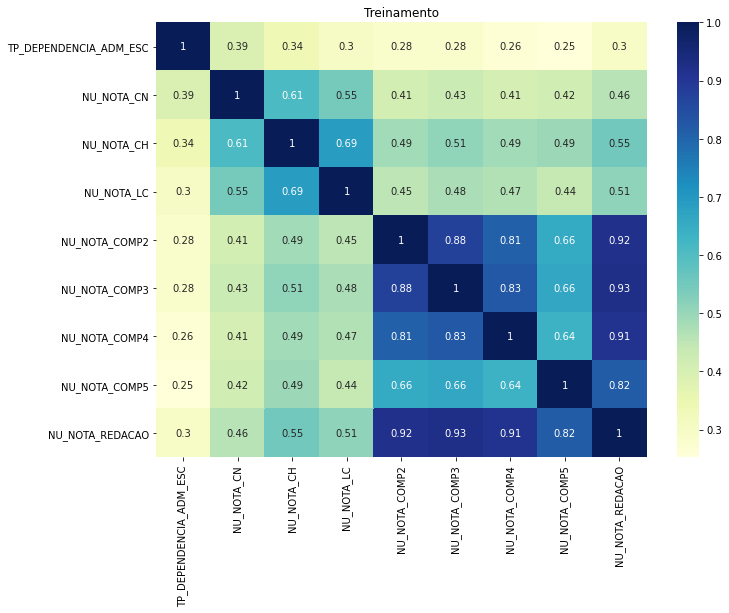

In [506]:
corr = treinamento[features_list].corr()
ax = plt.subplots(figsize=(11, 8))
plt.title('Treinamento')
sns.heatmap(corr,  annot=True, annot_kws={"size": 10},cmap="YlGnBu");

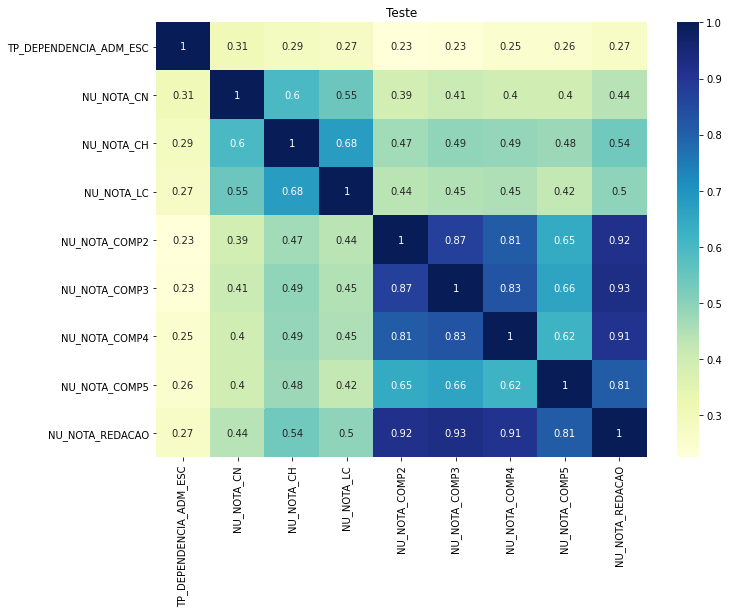

In [507]:
features_list = features.index.to_list()
corr = teste[features_list].corr()
ax = plt.subplots(figsize=(11, 8))
plt.title('Teste')
sns.heatmap(corr,  annot=True, annot_kws={"size": 10},cmap="YlGnBu");

In [508]:
treinamento[features_list_with_target].isnull().sum()

TP_DEPENDENCIA_ADM_ESC    9448
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_COMP4             3597
NU_NOTA_COMP5             3597
NU_NOTA_REDACAO           3597
NU_NOTA_MT                3597
dtype: int64

In [509]:
teste[features_list].isnull().sum()

TP_DEPENDENCIA_ADM_ESC    3096
NU_NOTA_CN                1134
NU_NOTA_CH                1134
NU_NOTA_LC                1199
NU_NOTA_COMP2             1199
NU_NOTA_COMP3             1199
NU_NOTA_COMP4             1199
NU_NOTA_COMP5             1199
NU_NOTA_REDACAO           1199
dtype: int64

In [0]:
treinamento_processado = preencheZero(treinamento, features_list_with_target)
teste_processado = preencheZero(teste, features_list)

In [511]:
treinamento_processado[features_list_with_target].isnull().sum()

TP_DEPENDENCIA_ADM_ESC    0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
NU_NOTA_COMP2             0
NU_NOTA_COMP3             0
NU_NOTA_COMP4             0
NU_NOTA_COMP5             0
NU_NOTA_REDACAO           0
NU_NOTA_MT                0
dtype: int64

In [512]:
teste_processado[features_list].isnull().sum()

TP_DEPENDENCIA_ADM_ESC    0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
NU_NOTA_COMP2             0
NU_NOTA_COMP3             0
NU_NOTA_COMP4             0
NU_NOTA_COMP5             0
NU_NOTA_REDACAO           0
dtype: int64

In [0]:
# Separação das features do Target
X = treinamento_processado[features_list]
y = treinamento_processado['NU_NOTA_MT']

In [0]:
# Divisão do conjunto em treinamento e teste. 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Linear regression

In [0]:
#Modelo Regressão Linear
regressaoLinear = LinearRegression()

In [523]:
#Testa com o conjunto de Treinamento/Teste
regressaoLinear.fit(X_train, y_train) 

print('X = {} \nY = {}'.format(regressaoLinear.intercept_, regressaoLinear.coef_))

y_pred = regressaoLinear.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Coeficiente de Determinação (R2):", r2)

X = 355.6452294246177 
Y = [  2.01857911  76.03965174 -30.25174979 154.84488499  -1.08808563
  -3.21762078   2.71912296   2.66607451  20.25641545]
Coeficiente de Determinação (R2): 0.9025076401190802


In [524]:
#Testa usando cross_val_score
scores = cross_val_score(regressaoLinear, X, y, cv=5, scoring='r2')
scores.mean()

0.9025456144308407

In [525]:
#Gero o modelo de resposta com todo o conjunto de treinamento para validar com o teste do site
regressaoLinear.fit(X, y)

print('X = {} \nY = {}'.format(regressaoLinear.intercept_, regressaoLinear.coef_))

y_pred_Linear = regressaoLinear.predict(teste_processado[features_list])

salvaResposta(y_pred_Linear, "RegressaoLinear")

X = -3.5166402218328017 
Y = [ 2.04379848  0.34930177 -0.12607479  0.66502713  0.0041722  -0.02692107
  0.04849697  0.03350465  0.06716426]


### Random Forest regression

In [0]:
#Modelo RandomForest
randomForest = RandomForestRegressor(max_depth=6, n_estimators=50, random_state=0)

In [527]:
#Testa com o conjunto de Treinamento/Teste
randomForest.fit(X_train, y_train)

y_pred = randomForest.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Coeficiente de Determinação (R2):", r2)

Coeficiente de Determinação (R2): 0.9233161891604565


In [528]:
#Testa usando cross_val_score
scores = cross_val_score(randomForest, X, y, cv=5, scoring='r2')
scores.mean()

0.9222150945059727

In [0]:
#Gero o modelo de resposta com todo o conjunto de treinamento para validar com o teste do site
randomForest.fit(X, y)

y_pred_randomForest = randomForest.predict(teste_processado[features_list])

salvaResposta(y_pred_randomForest, "RandomForest")

### Random Forest with Grid Search Cross-Validation

In [0]:
#Ajuste de parâmetros usando o GridSearch
gsc = GridSearchCV(estimator=RandomForestRegressor(),
                   param_grid={'max_depth': range(0,15),
                               'n_estimators': (5, 10, 20, 40, 50, 100, 200, 400, 500, 800, 900, 1000, 1100, 1300),
                               },
                   cv=5, scoring='r2', verbose=1, n_jobs=-1)

grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_
print(best_params)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 486 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 836 tasks      | elapsed: 52.4min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed: 81.6min finished


{'max_depth': 6, 'n_estimators': 1000}


In [0]:
#Modelo RandomForest
#{'max_depth': 6, 'n_estimators': 1000}
randomForestGridSearch = RandomForestRegressor(max_depth=6, n_estimators=1000, random_state=False, verbose=False)

In [532]:
#Testa com o conjunto de Treinamento/Teste
randomForestGridSearch.fit(X_train, y_train)

y_pred = randomForestGridSearch.predict(X_test)
r2 = randomForestGridSearch.score(X_test, y_test)

print("Coeficiente de Determinação (R2):", r2)

Coeficiente de Determinação (R2): 0.9233715948599448


In [533]:
#Testa usando cross_val_score
scores = cross_val_score(randomForestGridSearch, X, y, cv=5, scoring='r2')
scores.mean()

0.9222328421243686

In [0]:
#Gero o modelo de resposta com todo o conjunto de treinamento para validar com o teste do site
randomForestGridSearch.fit(X, y)

y_pred_randomForestGridSearch = randomForestGridSearch.predict(teste_processado[features_list])

salvaResposta(y_pred_randomForestGridSearch, "RandomForestGridSearch")

### GradientBoostingRegressor



In [0]:
#Tunning
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100,500,1000],
              'max_depth'    : [4,6,8]
              }
              
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1)
grid.fit(X_train, y_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)
print("\n ========================================================")



 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9223936760945417

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}



In [0]:
#Modelo GradientBoostingRegressor
#gradientBoostingRegressor = GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5)
gradientBoostingRegressor = GradientBoostingRegressor()

In [536]:
#Testa com o conjunto de Treinamento/Teste
gradientBoostingRegressor.fit(X_train, y_train)

gradientBoostingRegressor.predict(X_test)
r2 = gradientBoostingRegressor.score(X_test, y_test)

print("Coeficiente de Determinação (R2):", r2)

Coeficiente de Determinação (R2): 0.9234798334420287


In [537]:
#Testa usando cross_val_score
scores = cross_val_score(gradientBoostingRegressor, X, y, cv=5, scoring='r2')
scores.mean()

0.9224037032060239

In [0]:
#Gero o modelo de resposta com todo o conjunto de treinamento para validar com o teste do site
gradientBoostingRegressor.fit(X, y)

y_pred_gradientBoostingRegressor = gradientBoostingRegressor.predict(teste_processado[features_list])

salvaResposta(y_pred_gradientBoostingRegressor, "GradientBoostingRegressor")

In [0]:
#Análise
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3992.3651


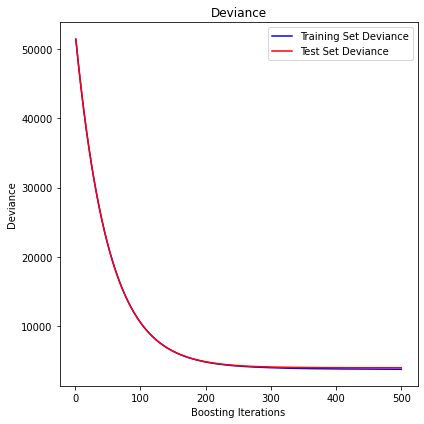

In [0]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

### KNeighborsRegressor



In [0]:
#Modelo GradientBoostingRegressor
kNeighborsRegressor = KNeighborsRegressor()

In [541]:
#Testa com o conjunto de Treinamento/Teste
kNeighborsRegressor.fit(X_train, y_train)

kNeighborsRegressor.predict(X_test)
r2 = kNeighborsRegressor.score(X_test, y_test)

print("Coeficiente de Determinação (R2):", r2)

Coeficiente de Determinação (R2): 0.9075467968107819


In [542]:
#Testa usando cross_val_score
scores = cross_val_score(kNeighborsRegressor, X, y, cv=5, scoring='r2')
scores.mean()

0.9076139658164667

In [0]:
#Gero o modelo de resposta com todo o conjunto de treinamento para validar com o teste do site
kNeighborsRegressor.fit(X, y)

y_pred_kNeighborsRegressor = gradientBoostingRegressor.predict(teste_processado[features_list])

salvaResposta(y_pred_kNeighborsRegressor, "KNeighborsRegressor")

### DecisionTreeRegressor



In [0]:
#Modelo DecisionTreeRegressor
decisionTreeRegressor = DecisionTreeRegressor()

In [546]:
#Testa com o conjunto de Treinamento/Teste
decisionTreeRegressor.fit(X_train, y_train)

decisionTreeRegressor.predict(X_test)
r2 = decisionTreeRegressor.score(X_test, y_test)

print("Coeficiente de Determinação (R2):", r2)

Coeficiente de Determinação (R2): 0.8412273022708534


In [547]:
#Testa usando cross_val_score
scores = cross_val_score(decisionTreeRegressor, X, y, cv=5, scoring='r2')
scores.mean()

0.8399235710535832

In [0]:
#Gero o modelo de resposta com todo o conjunto de treinamento para validar com o teste do site
decisionTreeRegressor.fit(X, y)

y_pred_decisionTreeRegressor = decisionTreeRegressor.predict(teste_processado[features_list])

salvaResposta(y_pred_decisionTreeRegressor, "DecisionTreeRegressor")

### Resumo dos Classificadores



In [0]:
from sklearn.pipeline import Pipeline

pipelines = []
pipelines.append(('RegressaoLinear', Pipeline([('RegressaoLinear', LinearRegression())])))
pipelines.append(('RandomForest', Pipeline([('RandomForest', RandomForestRegressor())])))
pipelines.append(('GradientBoostingRegressor', Pipeline([('GradientBoostingRegressor', GradientBoostingRegressor())])))
pipelines.append(('KNeighborsRegressor', Pipeline([('KNeighborsRegressor', KNeighborsRegressor())])))
pipelines.append(('DecisionTreeRegressor', Pipeline([('DecisionTreeRegressor', DecisionTreeRegressor())])))

In [551]:
validaPerformanceModelos(pipelines, X, y)

RegressaoLinear: 0.902546 (0.003353)
RandomForest: 0.917183 (0.003632)
GradientBoostingRegressor: 0.922383 (0.003538)
KNeighborsRegressor: 0.907614 (0.003986)
DecisionTreeRegressor: 0.839895 (0.005196)
